# Analysis of Marijuana Usage Habits

## Executive Summary

This project uses data sourced from DataFirst (UCT), to compare demographic information (income, location, etc.) and availability of marijuana, to the usage thereof.

1. Determine if correlations between demographic data (personal income, age, race, gender, etc.) and marijuana use (frequency of purchase/use, quality, etc.) exist. Does age or location determine the frequency or initial age of marijuana use? Does personal income affect the quality and volume of marijuana purchased?

### Limitations

The dataset is relatively small, and there are some proportionality issues with the gender, location, etc. of the survey participants. Considering the somewhat sensitive topic as well, there is the issue of willingness to answer the survey, and possible human error or inaccurate information skewing the results.

## Introduction

With the decriminalisation of private use of marijuana (particularly in South Africa), analysing the usage habits and demographics of marijuana consumers is more relevant than ever. In this project, we ask:

1. How does personal income affect frequency and volume of marijuana use? Do consumers purchase more with more disposable income, do they purchase better quality, or some combination of both?

2. Who is most likely to purchase low, medium, or high quality marijuana, and is this affected by the volume of their use?

## Overview of Notebook Contents

### Data Description

Here you will find the origin and contents of the dataset, the collection method and date of collection, the size and date of access/download, as well as a brief description of aspects of quality, and the ability of the dataset to answer our question.

### Data Wrangling

Here you will find the initial tidying of the data, the techniques used and a comparison of the 

## Data Description
***
#### Origin: The dataset was obtained from DataFirst, run by the university of Cape Town
#### Content: The dataset consists of features of cannabis consumption by South Africans from various socio-economic groups, provinces, settlment types and racial groups. 
#### Date Collected: 2017
#### Collection Method: Primary data collection (method), it was collected via survery of cannabis users.
#### Dataset Size: 2241 datapoints (rows) and 21 features (columns)
#### Date Downloaded: 05/03/2021 (5th of March 2021)
***
## Inspecting the data to assess quality and to validlity

In [1]:
#NOTE: REMOVE IMPORTS AFTER COMBINING WITH GROUP
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('mode.chained_assignment', None)

dataset = pd.read_csv("cdpd-2017-csv.csv")
print("Checking data validity")
for i in range(20):
    print("----------------------------------------------------------------------------")
    col0 = dataset.iloc[:,i].unique()
    print(col0)


Checking data validity
----------------------------------------------------------------------------
['I consent']
----------------------------------------------------------------------------
['Male' 'Female' 'I would prefer not to answer' '.']
----------------------------------------------------------------------------
['Other' 'I would prefer to not answer' 'White' '.' 'African' 'Indian'
 'Coloured' 'Asian']
----------------------------------------------------------------------------
['< 20 years (younger than 20 years)' '30-39 years' '20-29 years'
 '50 years and above' '.' '40-49 years']
----------------------------------------------------------------------------
['R5000-R9999' 'R10 000- R14 999' '< R1000 (less than R1000)'
 'R20 000- R24 999' 'R1000- R4999' 'R15 000- R19 999' 'R30 000 and above'
 'R25 000- R29 999' '.']
----------------------------------------------------------------------------
['2-3 times per week' 'Everyday' '2-3 times per month' 'Once per week'
 'Once per month 

***
 -  #### Validations:
    -  The data's format is consistent as can be seen above.
    -  We can see that the surveryed people used "." in areas they chose not to answer - in the general case. For areas of numerics NaN is used.
    -  The columns variable types remained consistent in their respective columns and the shapes of the datapoints (the number of features) remained consistent.
***
#### Inspecting the data quality


In [2]:
print("####################################################################")   
print("Checking data quality")
print("####################################################################")   
for i in range(0,13):
    col = dataset.iloc[:,i].value_counts()
    print(col)
    print("----------------------------------------------------------------------------")

####################################################################
Checking data quality
####################################################################
I consent    2241
Name: q1, dtype: int64
----------------------------------------------------------------------------
Male                            1606
Female                           615
I would prefer not to answer      18
.                                  2
Name: q2, dtype: int64
----------------------------------------------------------------------------
White                           1544
Coloured                         251
African                          209
I would prefer to not answer     102
Indian                            88
Other                             28
.                                 11
Asian                              8
Name: q3, dtype: int64
----------------------------------------------------------------------------
20-29 years                           1439
30-39 years                        

***
 - #### Data Quality Analysis (first 14 questions):
    - The surveyed people in the dataset all consented which is what we would expect, as for their information to be kept this would be required.
    - The data contains very few NaNs (in number ranges) & very few places were no answer was chosen(not specified) represented by '.'. This shows decent quality in the first 14 data points
    - There is a mix of different ethnicities, genders and locations as we would expect for a survery that would represent South African users in a general sense.
    - The size of purchase (in grams) and the price of the entire purchase (ZAR) indicate that most people are consumers - since the price and quantity is smaller. It does seem however a few dealers may be in the dataset. This would make some sense given the survey was on cannabis use but not necessarily how they use it entirely and given that there are very few dealers in the set, this would make sense in a consumer supplier model.
    - The top two provinces make sense given their population size.
    
***
 -  #### Note to reader going further for q14_:
      - u indicates urban
      - r indicates residential
      - i indicates industrial
      - rur indicates rural
      - m indicates mixed
      - pnd indicates not disclosed
      
***

In [3]:
tot = 0
pnd = 0
for i in range(13,19):
    col = dataset.iloc[:,i].value_counts()
    print(col)
    if i != 18:
        tot = tot + col.to_numpy()[1]
    else:
        pnd = col.to_numpy()[1]
    print("----------------------------------------------------------------------------")
    
print("The total of the answered settlement types is " + str(tot))
tot = tot+pnd
print("Which with the people who chose not to answer gives a total of " + str(tot))

.       1658
true     583
Name: q14_u, dtype: int64
----------------------------------------------------------------------------
true    1155
.       1086
Name: q14_r, dtype: int64
----------------------------------------------------------------------------
.       2221
true      20
Name: q14_i, dtype: int64
----------------------------------------------------------------------------
.       2185
true      56
Name: q14_rur, dtype: int64
----------------------------------------------------------------------------
.       2000
true     241
Name: q14_m, dtype: int64
----------------------------------------------------------------------------
.       2074
true     167
Name: q14_pnd, dtype: int64
----------------------------------------------------------------------------
The total of the answered settlement types is 1986
Which with the people who chose not to answer gives a total of 2153


***
 - #### Further Data Quality Analysis on Settlements:
     - Most people live in places we would expect them to, so residential areas and urban zones
     - There does exist a bit of mismatch, as there are 88 people who did not answer this question at all, however this is a small proportion and is acceptable and can be dealt with in data wrangling
***

In [4]:
for i in range(19,27):
    col = dataset.iloc[:,i].value_counts()
    print(col)
    print("----------------------------------------------------------------------------")

Series([], Name: q15, dtype: int64)
----------------------------------------------------------------------------
10.0    633
8.0     433
7.0     269
5.0     208
9.0     207
6.0     152
4.0      96
2.0      90
3.0      89
1.0      59
Name: q16, dtype: int64
----------------------------------------------------------------------------
More than 30 days    312
30                   307
7                    282
5                    155
14                   148
2                    148
3                    147
10                   120
4                     89
1                     77
20                    66
25                    59
15                    57
21                    53
6                     52
8                     26
12                    24
.                     24
9                     14
28                    12
16                    10
22                     9
24                     9
17                     9
27                     6
13                     5
26              

***
- #### Data Quality Analysis Conclusion:
    - The data set seems to be of decent quality overal, with very few missing entries and a general catch of the users of cannabis.
    - Overall the quality of the data set is good and follows standard format with acceptable answers.
    
***
 - #### Ability to Answer Question:
     - The data set contains a varied crowd of users and has decent data quality, so general inferences can be made using the data set.
     - The data set also gives a general idea of consumption characterisitcs in the frequency, quantity, quality and prices of cannabis consumption by the average user.
     - Alongside the income ranges given in the data set, characterisitics can be found to answer and substantiate the focus question as well as other interesting questions that may be asked as further analysis is undertaken.

## Data Wrangling

#### Tidyness of Data and Tidying Data

In some instances we can see that survey participants left their answers blank when there was a possible option where they did not have to disclose their data at all. There are examples of this happening as seen in the total counts above for the following columns: q2,q3,q6,q7,q20 and q21. We will just rectify this issue by changing these records to the appropriate answer where they did not have to disclose their data.

In [5]:
dataset['q2'].loc[dataset['q2'] == '.'] = 'I would prefer not to answer'
dataset['q3'].loc[dataset['q3'] == '.'] = 'I would prefer to not answer'
dataset['q6'].loc[dataset['q6'] == '.'] = 'I do not wish to disclose this information'
dataset['q7'].loc[dataset['q7'] == '.'] = 'I do not wish to disclose this information'
dataset['q20'].loc[dataset['q20'] == '.'] = 'I do not wish to disclose this information'
dataset['q21'].loc[dataset['q21'] == '.'] = 'I do not wish to disclose this information'

When looking at the dataset we can see for every record, the column regarding q15(Data when purchase took place) is blank(NaN). This is further backed up by the total counts of the column in the section above. Thus I am going to remove this column in its entirety as it adds no value to the dataset as it is empty.

In [6]:
print(dataset['q15'])
del dataset['q15']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
2236   NaN
2237   NaN
2238   NaN
2239   NaN
2240   NaN
Name: q15, Length: 2241, dtype: float64


Put data in to an undisclosed category if no data was provided for that specific question or if the person did not wish to answer that question.

In [7]:
dataset['q2'].loc[dataset['q2'] == 'I would prefer not to answer'] = 'Undisclosed'
dataset['q3'].loc[dataset['q3'] == 'I would prefer to not answer'] = 'Undisclosed'
dataset['q4'].loc[dataset['q4'] == '.'] = 'Undisclosed'
dataset['q5'].loc[dataset['q5'] == '.'] = 'Undisclosed'
dataset['q6'].loc[dataset['q6'] == 'I do not wish to disclose this information'] = 'Undisclosed'
dataset['q7'].loc[dataset['q7'] == 'I do not wish to disclose this information'] = 'Undisclosed'
dataset['q11'].loc[dataset['q11'] == '.'] = 'Undisclosed'
dataset['q13'].loc[dataset['q13'] == '.'] = 'Undisclosed'
dataset['q17'].loc[dataset['q17'] == '.'] = 'Undisclosed'
dataset['q18'].loc[dataset['q18'] == '.'] = 'Undisclosed'
dataset['q20'].loc[dataset['q20'] == 'I do not wish to disclose this information'] = 'Undisclosed'
dataset['q21'].loc[dataset['q21'] == 'I do not wish to disclose this information'] = 'Undisclosed'

This helps us to change the datatype of the settlements to the correct datatype later on in the tidying process. We will want to make all the columns pertaining to the settlements of type boolean. Thus we set the values of the data with '.' to the empty string so once converted they become False.

In [8]:
dataset['q14_u'].loc[dataset['q14_u'] == '.'] = ''
dataset['q14_u'].loc[dataset['q14_u'] == 'true'] = 'True'
dataset['q14_r'].loc[dataset['q14_r'] == '.'] = ''
dataset['q14_u'].loc[dataset['q14_r'] == 'true'] = 'True'
dataset['q14_i'].loc[dataset['q14_i'] == '.'] = ''
dataset['q14_u'].loc[dataset['q14_i'] == 'true'] = 'True'
dataset['q14_rur'].loc[dataset['q14_rur'] == '.'] = ''
dataset['q14_u'].loc[dataset['q14_rur'] == 'true'] = 'True'
dataset['q14_m'].loc[dataset['q14_m'] == '.'] = ''
dataset['q14_u'].loc[dataset['q14_m'] == 'true'] = 'True'
dataset['q14_pnd'].loc[dataset['q14_pnd'] == '.'] = ''
dataset['q14_u'].loc[dataset['q14_pnd'] == 'true'] = 'True'

Remove records seen while checking the data beforehand where the people said they grew their own marijuana. Their data would not be useful as they then obviously would not buy marijuana from other people and we need that information as well. 

In [9]:
i = dataset[((dataset['q12'] == '.') & (dataset['q13'] == 'Grow my own'))].index
dataset = dataset.drop(i)

i = dataset[dataset['q13'] == 'I grow my own'].index
dataset = dataset.drop(i)

i = dataset[dataset['q13'] == "I don't purchase"].index
dataset = dataset.drop(i)

##### Fixing city/town data

Try sort out any inconsistencies with people who said they reside in the Western Cape. As seen below from what is printed out, there are multiple spelling errors in this category. Also people tend to put suburbs as their answer instead of their city/town which is what the question is asking so we will rectify this as well. We can also see that some people did not want to disclose their info so we will put these entries in an 'undisclosed' category.

In [10]:
print("WESTERN CAPE DATA BEFORE FIXING")
print(dataset['q13'].loc[dataset['q12'] == 'The Western Cape'].value_counts())
print("-----------------------------------------------------")

#fixing spelling errors & changing suburbs people put in to their repective city or town as it asked for city or town
#also putting the people who did not want to disclose their info in an 'undisclosed' category
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Cape town')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'cape town')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Cape Twon')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Cape town')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'CApe Town')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Cpt')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Table view/cape town')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Cape Towm')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Cape Town Milnerton')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'City Bowl')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Sunningdale')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Newlands')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Cappe town')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Cape towm')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Athlone')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Elsies River')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Woodstock, cape town')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Plumstead')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Athlone, Cape Town')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Rosebank, Cape Town')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Cape Town, Obs')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'EdgemeadTableview')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Monte Vista')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'northern suburbs')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Ocean View')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Blouberg')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'City Centre')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Woodstock cape town')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Rondebosch,Cape Town')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Hout bay')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'CThasshittyweed')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Plattekloof CPT')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Cape flats')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Southern Suburbs')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Cape Town city')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Table View, Cape Tow')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'City')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Cake Town')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Philipi')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Vanguard Estate')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Sea point Cape Town')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Sea Point')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'CT')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'CPT')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Claremont')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Capetown')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Observatory')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Parow')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Century City')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Southern suburbs')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Northern suburbs')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'capetown')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Tableview')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Table View')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Goodwood')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'CapeTown')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'CAPE TOWN')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Wynberg')] = 'Cape Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Ceres wc')] = 'Ceres'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Bellville&Rustenburg')] = 'Bellville'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Belleville')] = 'Bellville'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Belville')] = 'Bellville'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Somerset West or Ron')] = 'Somerset West'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Somerset west')] = 'Somerset West'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Helderberg')] = 'Somerset West'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'WILDERNESS')] = 'Wilderness'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'overberg')] = 'Overberg'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'george')] = 'George'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Simons town')] = 'Simons Town'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Plettenberg bay')] = 'Plettenberg Bay'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == "Mitchell's plain")] = "Mitchell's Plain"
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Gordons bay')] = 'Gordons Bay'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'oudtshoorn')] = 'Oudtshoorn'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Mossel bay')] = 'Mossel Bay'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Nyanga, Cape Town')] = 'Nyanga'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Noordhoek/Cape Town')] = 'Noordhoek'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Mosselbay')] = 'Mossel Bay'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'knysna')] = 'Knysna'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'durbanville')] = 'Durbanville'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'hermanus')] = 'Hermanus'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'STELLENBOSCH')] = 'Stellenbosch'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == '7600')] = 'Stellenbosch'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Stellenbosh')] = 'Stellenbosch'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Stellenbsoch')] = 'Stellenbosch'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Stellies')] = 'Stellenbosch'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Fish Hoek and Ottery')] = 'Fish Hoek'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Fish hoek')] = 'Fish Hoek'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Kuilsriver')] = 'Kuils River'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'many dif places')] = 'Undisclosed'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Yeah no')] = 'Undisclosed'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'mxm')] = 'Undisclosed'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'everywhere')] = 'Undisclosed'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Everywhere ')] = 'Undisclosed'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Everywhere')] = 'Undisclosed'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Shopping mall')] = 'Undisclosed'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'None of yr business')] = 'Undisclosed'
dataset['q13'].loc[(dataset['q12'] == 'The Western Cape') & (dataset['q13'] == 'Cape of Good Dope')] = 'Undisclosed'

#when people provide two cities/towns then duplicate record but change the province and/or city/town so both are covered
multAnswer = dataset.loc[dataset['q13'] == 'Stellenbosch/cpt'].copy()
multAnswer['q13'] = 'Cape Town'
dataset = dataset.append(multAnswer , ignore_index=True)
multAnswer['q13'] = 'Stellenbosch'
dataset = dataset.append(multAnswer , ignore_index=True)
i = dataset[dataset['q13'] == 'Stellenbosch/cpt'].index
dataset = dataset.drop(i)

multAnswer = dataset.loc[dataset['q13'] == 'Cape Town & PE'].copy()
multAnswer['q12'] = 'The Western Cape'
multAnswer['q13'] = 'Cape Town'
dataset = dataset.append(multAnswer , ignore_index=True)
multAnswer['q12'] = 'The Eastern Cape'
multAnswer['q13'] = 'Port Elizabeth'
dataset = dataset.append(multAnswer , ignore_index=True)
i = dataset[dataset['q13'] == 'Cape Town & PE'].index
dataset = dataset.drop(i)

multAnswer = dataset.loc[dataset['q13'] == 'CPT/Stellenbosch'].copy()
multAnswer['q13'] = 'Cape Town'
dataset = dataset.append(multAnswer , ignore_index=True)
multAnswer['q13'] = 'Stellenbosch'
dataset = dataset.append(multAnswer , ignore_index=True)
i = dataset[dataset['q13'] == 'CPT/Stellenbosch'].index
dataset = dataset.drop(i)

multAnswer = dataset.loc[dataset['q13'] == 'Cape Town Stellenbo'].copy()
multAnswer['q13'] = 'Cape Town'
dataset = dataset.append(multAnswer , ignore_index=True)
multAnswer['q13'] = 'Stellenbosch'
dataset = dataset.append(multAnswer , ignore_index=True)
i = dataset[dataset['q13'] == 'Cape Town Stellenbo'].index
dataset = dataset.drop(i)

multAnswer = dataset.loc[dataset['q13'] == 'MosselbayGeorge'].copy()
multAnswer['q13'] = 'Mossel Bay'
dataset = dataset.append(multAnswer , ignore_index=True)
multAnswer['q13'] = 'George'
dataset = dataset.append(multAnswer , ignore_index=True)
i = dataset[dataset['q13'] == 'MosselbayGeorge'].index
dataset = dataset.drop(i)

multAnswer = dataset.loc[dataset['q13'] == 'Worcester and Knysna'].copy()
multAnswer['q13'] = 'Worcester'
dataset = dataset.append(multAnswer , ignore_index=True)
multAnswer['q13'] = 'Knysna'
dataset = dataset.append(multAnswer , ignore_index=True)
i = dataset[dataset['q13'] == 'Worcester and Knysna'].index
dataset = dataset.drop(i)

multAnswer = dataset.loc[dataset['q13'] == 'Plett-Knysna'].copy()
multAnswer['q13'] = 'Plettenberg Bay'
dataset = dataset.append(multAnswer , ignore_index=True)
multAnswer['q13'] = 'Knysna'
dataset = dataset.append(multAnswer , ignore_index=True)
i = dataset[dataset['q13'] == 'Plett-Knysna'].index
dataset = dataset.drop(i)

multAnswer = dataset.loc[dataset['q13'] == 'Cape Town/Paarl'].copy()
multAnswer['q13'] = 'Cape Town'
dataset = dataset.append(multAnswer , ignore_index=True)
multAnswer['q13'] = 'Paarl'
dataset = dataset.append(multAnswer , ignore_index=True)
i = dataset[dataset['q13'] == 'Cape Town/Paarl'].index
dataset = dataset.drop(i)

print("WESTERN CAPE DATA AFTER FIXING")
print(dataset['q13'].loc[dataset['q12'] == 'The Western Cape'].value_counts())

WESTERN CAPE DATA BEFORE FIXING
Cape Town          526
Cape town           98
Stellenbosch        85
Undisclosed         30
cape town           25
                  ... 
Winelands            1
Plattekloof CPT      1
Belleville           1
Mossel Bay           1
Stellenbsoch         1
Name: q13, Length: 144, dtype: int64
-----------------------------------------------------
WESTERN CAPE DATA AFTER FIXING
Cape Town           744
Stellenbosch         94
Undisclosed          38
George               22
Somerset West        16
Bellville            15
Paarl                13
Durbanville          12
Knysna                9
Strand                8
Worcester             7
Hermanus              5
Mossel Bay            4
Plettenberg Bay       4
Garden Route          3
Oudtshoorn            3
Fish Hoek             3
Muizenberg            3
Wilderness            2
Atlantis              2
Ceres                 2
Rondebosch            2
Wellington            2
Langebaan             2
Kraaifontein     

Try sort out any inconsistencies with people who said they reside in the Gauteng. As seen below from what is printed out, there are multiple spelling errors in this category. Also people tend to put suburbs as their answer instead of their city/town which is what the question is asking so we will rectify this as well. We can also see that some people did not want to disclose their info so we will put these entries in an 'undisclosed' category.

In [11]:
print("GAUTENG DATA BEFORE FIXING")
print(dataset['q13'].loc[dataset['q12'] == 'Gauteng'].value_counts())
print("-----------------------------------------------------")

#fixing spelling errors & changing suburbs people put in to their repective city or town as it asked for city or town
#also putting the people who did not want to disclose their info in an 'undisclosed' category
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Jhb')] = 'Johannesburg'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'JHB')] = 'Johannesburg'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Joburg')] = 'Johannesburg'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'joburg')] = 'Johannesburg'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'JOHANNESBURG')] = 'Johannesburg'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'johannesburg')] = 'Johannesburg'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Johanneshurg')] = 'Johannesburg'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Braamfontein')] = 'Johannesburg'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Yeoville')] = 'Johannesburg'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Northcliff')] = 'Johannesburg'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Jhb normally')] = 'Johannesburg'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Johennesburg')] = 'Johannesburg'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Johannesburg Cbd')] = 'Johannesburg'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Kensington')] = 'Johannesburg'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'jhb')] = 'Johannesburg'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Johanessburg')] = 'Johannesburg'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Johannesburg,')] = 'Johannesburg'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Greater Joburg')] = 'Johannesburg'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Malvern')] = 'Johannesburg'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == "Jo'burg")] = 'Johannesburg'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Bruma, East Rand')] = 'Johannesburg'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Johannesburg South')] = 'Johannesburg'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Vaal')] = 'Johannesburg'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Sunninghill')] = 'Johannesburg'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Braamfontein JHB')] = 'Johannesburg'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Newtown')] = 'Johannesburg'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Lonehill')] = 'Johannesburg'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Pta')] = 'Pretoria'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'PTA')] = 'Pretoria'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Pretoria East')] = 'Pretoria'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'PRETORIA')] = 'Pretoria'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Pretoria west')] = 'Pretoria'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Pretoria Sunnyside')] = 'Pretoria'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Pretoria, Gauteng')] = 'Pretoria'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'HatfieldJohannesbu')] = 'Pretoria'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Montana')] = 'Pretoria'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'pertoria')] = 'Pretoria'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'pretoria')] = 'Pretoria'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Primrose Germiston')] = 'Germiston'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Kempton Park, JHB')] = 'Kempton Park'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Kempton')] = 'Kempton Park'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Fourways')] = 'Sandton'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'roodepoort')] = 'Roodepoort'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Edenvale JHB')] = 'Edenvale'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Roodepoort Jhb')] = 'Roodepoort'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Albertom')] = 'Alberton'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'midrand')] = 'Midrand'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Kyalami')] = 'Midrand'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Bryanston')] = 'Sandton'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'SANDTON')] = 'Sandton'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Cresta')] = 'Randburg'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Rivonia')] = 'Sandton'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Phomolong, Tembisa')] = 'Tembisa'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'vanderbijlpark')] = 'Vanderbijlpark'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Ceder, Fourways')] = 'Sandton'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Soweto, Jhb')] = 'Soweto'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Vereeninging')] = 'Vereeniging'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Nope')] = 'Undisclosed'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'East rand')] = 'Undisclosed'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Westrand')] = 'Undisclosed'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Gauteng')] = 'Undisclosed'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'N.a.')] = 'Undisclosed'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Courier')] = 'Undisclosed'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Ekurhuleni')] = 'Undisclosed'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'All over S.A.')] = 'Undisclosed'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'All over S.A.')] = 'Undisclosed'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Wont disclose this')] = 'Undisclosed'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Confidential.')] = 'Undisclosed'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Ekhuruleni')] = 'Undisclosed'
dataset['q13'].loc[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == 'Mind your own busine')] = 'Undisclosed'

#when people provide two cities/towns then duplicate record but change the province and/or city/town so both are covered
multAnswer = dataset.loc[dataset['q13'] == 'Jhb / el/ pe / pta'].copy()
multAnswer['q12'] = 'Gauteng'
multAnswer['q13'] = 'Johannesburg'
dataset = dataset.append(multAnswer , ignore_index=True)
multAnswer['q12'] = 'Gauteng'
multAnswer['q13'] = 'Pretoria'
dataset = dataset.append(multAnswer , ignore_index=True)
multAnswer['q12'] = 'The Eastern Cape'
multAnswer['q13'] = 'East London'
dataset = dataset.append(multAnswer , ignore_index=True)
multAnswer['q12'] = 'The Eastern Cape'
multAnswer['q13'] = 'Port Elizabeth'
dataset = dataset.append(multAnswer , ignore_index=True)
i = dataset[dataset['q13'] == 'Jhb / el/ pe / pta'].index
dataset = dataset.drop(i)

multAnswer = dataset.loc[dataset['q13'] == 'Pretoria\JHB'].copy()
multAnswer['q13'] = 'Pretoria'
dataset = dataset.append(multAnswer , ignore_index=True)
multAnswer['q13'] = 'Johannesburg'
dataset = dataset.append(multAnswer , ignore_index=True)
i = dataset[dataset['q13'] == 'Pretoria\JHB'].index
dataset = dataset.drop(i)

multAnswer = dataset.loc[dataset['q13'] == 'Pretoria/JHB'].copy()
multAnswer['q13'] = 'Pretoria'
dataset.append(multAnswer , ignore_index=True)
multAnswer['q13'] = 'Johannesburg'
dataset.append(multAnswer , ignore_index=True)
i = dataset[dataset['q13'] == 'Pretoria/JHB'].index
dataset = dataset.drop(i)

multAnswer = dataset.loc[dataset['q13'] == 'Joburg and Pretoria'].copy()
multAnswer['q13'] = 'Pretoria'
dataset = dataset.append(multAnswer , ignore_index=True)
multAnswer['q13'] = 'Johannesburg'
dataset = dataset.append(multAnswer , ignore_index=True)
i = dataset[dataset['q13'] == 'Joburg and Pretoria'].index
dataset = dataset.drop(i)

multAnswer = dataset.loc[dataset['q13'] == 'Johannesburg/Midrand'].copy()
multAnswer['q13'] = 'Midrand'
dataset = dataset.append(multAnswer , ignore_index=True)
multAnswer['q13'] = 'Johannesburg'
dataset = dataset.append(multAnswer , ignore_index=True)
i = dataset[dataset['q13'] == 'Johannesburg/Midrand'].index
dataset = dataset.drop(i)

multAnswer = dataset.loc[dataset['q13'] == 'Joburg/ Randburg'].copy()
multAnswer['q13'] = 'Randburg'
dataset = dataset.append(multAnswer , ignore_index=True)
multAnswer['q13'] = 'Johannesburg'
dataset = dataset.append(multAnswer , ignore_index=True)
i = dataset[dataset['q13'] == 'Joburg/ Randburg'].index
dataset = dataset.drop(i)

i = dataset[(dataset['q12'] == 'Gauteng') & (dataset['q13'] == "free seeds cape town")].index
dataset = dataset.drop(i)

print("GAUTENG DATA AFTER FIXING")
print(dataset['q13'].loc[dataset['q12'] == 'Gauteng'].value_counts())

GAUTENG DATA BEFORE FIXING
Johannesburg      234
Pretoria          171
Jhb                20
Randburg           20
Undisclosed        20
                 ... 
Sunninghill         1
Kensington          1
Roodepoort Jhb      1
Ekurhuleni          1
jhb                 1
Name: q13, Length: 103, dtype: int64
-----------------------------------------------------
GAUTENG DATA AFTER FIXING
Johannesburg        305
Pretoria            188
Undisclosed          39
Randburg             22
Sandton              20
Centurion            16
Alberton             13
Benoni               11
Midrand              11
Boksburg             10
Roodepoort           10
Edenvale              7
Kempton Park          7
Vereeniging           7
Krugersdorp           4
Soweto                4
Vanderbijlpark        3
Westonaria            2
Springs               2
Germiston             2
Sebokeng              1
Tembisa               1
Bronkhorstspruit      1
Magaliesburg          1
Brakpan               1
Tsakane       

Try sort out any inconsistencies with people who said they reside in the Eastern Cape. As seen below from what is printed out, there are multiple spelling errors in this category. Also people tend to put suburbs as their answer instead of their city/town which is what the question is asking so we will rectify this as well. We can also see that some people did not want to disclose their info so we will put these entries in an 'undisclosed' category.

In [12]:
print("EASTERN CAPE DATA BEFORE FIXING")
print(dataset['q13'].loc[dataset['q12'] == 'The Eastern Cape'].value_counts())
print("-----------------------------------------------------")

#fixing spelling errors & changing suburbs people put in to their repective city or town as it asked for city or town
#also putting the people who did not want to disclose their info in an 'undisclosed' category
dataset['q13'].loc[(dataset['q12'] == 'The Eastern Cape') & (dataset['q13'] == 'Port elizabeth')] = 'Port Elizabeth'
dataset['q13'].loc[(dataset['q12'] == 'The Eastern Cape') & (dataset['q13'] == 'PE')] = 'Port Elizabeth'
dataset['q13'].loc[(dataset['q12'] == 'The Eastern Cape') & (dataset['q13'] == 'pe')] = 'Port Elizabeth'
dataset['q13'].loc[(dataset['q12'] == 'The Eastern Cape') & (dataset['q13'] == 'Madela Bay')] = 'Port Elizabeth'
dataset['q13'].loc[(dataset['q12'] == 'The Eastern Cape') & (dataset['q13'] == 'Mandela  Bay')] = 'Port Elizabeth'
dataset['q13'].loc[(dataset['q12'] == 'The Eastern Cape') & (dataset['q13'] == 'Nelson Mandela Metro')] = 'Port Elizabeth'
dataset['q13'].loc[(dataset['q12'] == 'The Eastern Cape') & (dataset['q13'] == 'East london')] = 'East London'
dataset['q13'].loc[(dataset['q12'] == 'The Eastern Cape') & (dataset['q13'] == 'East lobdon')] = 'East London'
dataset['q13'].loc[(dataset['q12'] == 'The Eastern Cape') & (dataset['q13'] == 'Southernwood')] = 'East London'
dataset['q13'].loc[(dataset['q12'] == 'The Eastern Cape') & (dataset['q13'] == 'grahamstown')] = 'Grahamstown'
dataset['q13'].loc[(dataset['q12'] == 'The Eastern Cape') & (dataset['q13'] == "Jeffrey's Bay")] = "Jeffreys Bay"
dataset['q13'].loc[(dataset['q12'] == 'The Eastern Cape') & (dataset['q13'] == "Jeffreys bay")] = "Jeffreys Bay"
dataset['q13'].loc[(dataset['q12'] == 'The Eastern Cape') & (dataset['q13'] == 'Eastern Cape')] = 'Undisclosed'
dataset['q13'].loc[(dataset['q12'] == 'The Eastern Cape') & (dataset['q13'] == 'EC')] = 'Undisclosed'
dataset['q13'].loc[(dataset['q12'] == 'The Eastern Cape') & (dataset['q13'] == 'Cape town')] = 'Undisclosed'
dataset['q13'].loc[(dataset['q12'] == 'The Eastern Cape') & (dataset['q13'] == 'Order from gauteng')] = 'Undisclosed'
dataset['q13'].loc[(dataset['q12'] == 'The Eastern Cape') & (dataset['q13'] == 'Mdumbi, Transkei')] = 'Mdumbi'
dataset['q13'].loc[(dataset['q12'] == 'The Eastern Cape') & (dataset['q13'] == 'Makana')] = 'Makhanda'

print("EASTERN CAPE DATA AFTER FIXING")
print(dataset['q13'].loc[dataset['q12'] == 'The Eastern Cape'].value_counts())

EASTERN CAPE DATA BEFORE FIXING
Grahamstown             64
Port Elizabeth          49
East London             25
Undisclosed              6
Port elizabeth           6
PE                       3
Port Alfred              3
Queenstown               3
Eastern Cape             2
Mthatha                  2
Uitenhage                2
East london              2
pe                       1
Cookhouse                1
Makana                   1
Cape St Francis          1
grahamstown              1
Jeffrey's Bay            1
Butterworth              1
Cape town                1
Coffee Bay               1
Steynsburg               1
Southernwood             1
Order from gauteng       1
Nelson Mandela Metro     1
EC                       1
Mandela  Bay             1
Jeffreys Bay             1
Mdumbi, Transkei         1
East lobdon              1
Jeffreys bay             1
Flagstaff                1
Name: q13, dtype: int64
-----------------------------------------------------
EASTERN CAPE DATA AFTER FI

Try sort out any inconsistencies with people who said they reside in the KwaZulu-Natal. As seen below from what is printed out, there are multiple spelling errors in this category. Also people tend to put suburbs as their answer instead of their city/town which is what the question is asking so we will rectify this as well. We can also see that some people did not want to disclose their info so we will put these entries in an 'undisclosed' category.

In [13]:
print("KWAZULU-NATAL DATA BEFORE FIXING")
print(dataset['q13'].loc[dataset['q12'] == 'KwaZulu-Natal'].value_counts())
print("-----------------------------------------------------")

#fixing spelling errors & changing suburbs people put in to their repective city or town as it asked for city or town
#also putting the people who did not want to disclose their info in an 'undisclosed' category
dataset['q13'].loc[(dataset['q12'] == 'KwaZulu-Natal') & (dataset['q13'] == 'durban')] = 'Durban'
dataset['q13'].loc[(dataset['q12'] == 'KwaZulu-Natal') & (dataset['q13'] == 'Verulam, Durban')] = 'Durban'
dataset['q13'].loc[(dataset['q12'] == 'KwaZulu-Natal') & (dataset['q13'] == 'La Lucia')] = 'Durban'
dataset['q13'].loc[(dataset['q12'] == 'KwaZulu-Natal') & (dataset['q13'] == 'Dbn')] = 'Durban'
dataset['q13'].loc[(dataset['q12'] == 'KwaZulu-Natal') & (dataset['q13'] == 'Kloof')] = 'Durban'
dataset['q13'].loc[(dataset['q12'] == 'KwaZulu-Natal') & (dataset['q13'] == 'Durban Area')] = 'Durban'
dataset['q13'].loc[(dataset['q12'] == 'KwaZulu-Natal') & (dataset['q13'] == 'Umbilo')] = 'Durban'
dataset['q13'].loc[(dataset['q12'] == 'KwaZulu-Natal') & (dataset['q13'] == 'pmb')] = 'Pietermaritzburg'
dataset['q13'].loc[(dataset['q12'] == 'KwaZulu-Natal') & (dataset['q13'] == 'Port shepstone area')] = 'Port Shepstone'
dataset['q13'].loc[(dataset['q12'] == 'KwaZulu-Natal') & (dataset['q13'] == 'Port shepstone')] = 'Port Shepstone'
dataset['q13'].loc[(dataset['q12'] == 'KwaZulu-Natal') & (dataset['q13'] == 'Richards bay')] = 'Richards Bay'
dataset['q13'].loc[(dataset['q12'] == 'KwaZulu-Natal') & (dataset['q13'] == 'Richardsbay')] = 'Richards Bay'
dataset['q13'].loc[(dataset['q12'] == 'KwaZulu-Natal') & (dataset['q13'] == 'Richards-bay')] = 'Richards Bay'
dataset['q13'].loc[(dataset['q12'] == 'KwaZulu-Natal') & (dataset['q13'] == 'Port edward')] = 'Port Edward'
dataset['q13'].loc[(dataset['q12'] == 'KwaZulu-Natal') & (dataset['q13'] == 'umgababa')] = 'Umgababa'
dataset['q13'].loc[(dataset['q12'] == 'KwaZulu-Natal') & (dataset['q13'] == "Queen's burgh")] = 'Queensburgh'
dataset['q13'].loc[(dataset['q12'] == 'KwaZulu-Natal') & (dataset['q13'] == 'No comment')] = 'Undisclosed'
dataset['q13'].loc[(dataset['q12'] == 'KwaZulu-Natal') & (dataset['q13'] == 'Will not disclose')] = 'Undisclosed'
dataset['q13'].loc[(dataset['q12'] == 'KwaZulu-Natal') & (dataset['q13'] == 'South Coast KZN')] = 'Undisclosed'
dataset['q13'].loc[(dataset['q12'] == 'KwaZulu-Natal') & (dataset['q13'] == 'Purchased online')] = 'Undisclosed'
dataset['q13'].loc[(dataset['q12'] == 'KwaZulu-Natal') & (dataset['q13'] == 'Nope')] = 'Undisclosed'

#when people provide two cities/towns then duplicate record but change the province and/or city/town so both are covered
multAnswer = dataset.loc[dataset['q13'] == 'Durban and Pretoria'].copy()
multAnswer['q12'] = 'KwaZulu-Natal'
multAnswer['q13'] = 'Durban'
dataset = dataset.append(multAnswer , ignore_index=True)
multAnswer['q12'] = 'Gauteng'
multAnswer['q13'] = 'Pretoria'
dataset = dataset.append(multAnswer , ignore_index=True)
i = dataset[dataset['q13'] == 'Durban and Pretoria'].index
dataset = dataset.drop(i)

print("KWAZULU-NATAL DATA AFTER FIXING")
print(dataset['q13'].loc[dataset['q12'] == 'KwaZulu-Natal'].value_counts())

KWAZULU-NATAL DATA BEFORE FIXING
Durban                 94
Pietermaritzburg       14
Undisclosed             6
Ballito                 5
Hillcrest               4
durban                  3
Margate                 2
Pinetown                2
Richardsbay             2
Richards bay            2
pmb                     2
Stanger                 2
Richards Bay            2
Howick                  2
Dbn                     1
Hibberdene              1
Newcastle               1
Verulam, Durban         1
South Coast KZN         1
Salt Rock               1
umgababa                1
Umbilo                  1
Durban Area             1
Ladysmith               1
Port shepstone          1
Queen's burgh           1
Port Shepstone          1
Umkomaas                1
Winkelspruit            1
Umhlanga                1
Westville               1
Richards-bay            1
Isipingo                1
Sodwana Bay             1
Purchased online        1
Amanzimtoti             1
Port edward             1
Durba

Try sort out any inconsistencies with people who said they reside in the Mpumalanga. As seen below from what is printed out, there are multiple spelling errors in this category. Also people tend to put suburbs as their answer instead of their city/town which is what the question is asking so we will rectify this as well. We can also see that some people did not want to disclose their info so we will put these entries in an 'undisclosed' category.

In [14]:
print("MPUMALANGA DATA BEFORE FIXING")
print(dataset['q13'].loc[dataset['q12'] == 'Mpumalanga'].value_counts())
print("-----------------------------------------------------")

#fixing spelling errors & changing suburbs people put in to their repective city or town as it asked for city or town
#also putting the people who did not want to disclose their info in an 'undisclosed' category
dataset['q13'].loc[(dataset['q12'] == 'Mpumalanga') & (dataset['q13'] == 'Nelspruit region')] = 'Nelspruit'
dataset['q13'].loc[(dataset['q12'] == 'Mpumalanga') & (dataset['q13'] == 'Emalahleni')] = 'Witbank'
dataset['q13'].loc[(dataset['q12'] == 'Mpumalanga') & (dataset['q13'] == 'Mpumalanga')] = 'Undisclosed'
dataset['q13'].loc[(dataset['q12'] == 'Mpumalanga') & (dataset['q13'] == 'Johannesburg')] = 'Undisclosed'
dataset['q13'].loc[(dataset['q12'] == 'Mpumalanga') & (dataset['q13'] == 'Pienaar SpyJozi')] = 'Undisclosed'
dataset['q13'].loc[(dataset['q12'] == 'Mpumalanga') & (dataset['q13'] == 'White river')] = 'White River'
dataset['q13'].loc[(dataset['q12'] == 'Mpumalanga') & (dataset['q13'] == 'middelburg')] = 'Middelburg'
dataset['q13'].loc[(dataset['q12'] == 'Mpumalanga') & (dataset['q13'] == 'Haxyview')] = 'Hazyview'

print("MPUMALANGA DATA AFTER FIXING")
print(dataset['q13'].loc[dataset['q12'] == 'Mpumalanga'].value_counts())

MPUMALANGA DATA BEFORE FIXING
Nelspruit           10
Undisclosed          7
Middelburg           6
Secunda              4
Witbank              2
Evander              2
Swaziland            2
White river          2
Emalahleni           1
Mpumalanga           1
Johannesburg         1
Barberton            1
Pienaar SpyJozi      1
middelburg           1
White River          1
Carolina             1
Lydenburg            1
Nelspruit region     1
Haxyview             1
Name: q13, dtype: int64
-----------------------------------------------------
MPUMALANGA DATA AFTER FIXING
Nelspruit      11
Undisclosed    10
Middelburg      7
Secunda         4
Witbank         3
White River     3
Swaziland       2
Evander         2
Hazyview        1
Carolina        1
Lydenburg       1
Barberton       1
Name: q13, dtype: int64


Try sort out any inconsistencies with people who said they reside in the Free State. As seen below from what is printed out, there are multiple spelling errors in this category. Also people tend to put suburbs as their answer instead of their city/town which is what the question is asking so we will rectify this as well. We can also see that some people did not want to disclose their info so we will put these entries in an 'undisclosed' category.

In [15]:
print("THE FREE STATE DATA BEFORE FIXING")
print(dataset['q13'].loc[dataset['q12'] == 'The Free State'].value_counts())
print("-----------------------------------------------------")

#fixing spelling errors & changing suburbs people put in to their repective city or town as it asked for city or town
#also putting the people who did not want to disclose their info in an 'undisclosed' category
dataset['q13'].loc[(dataset['q12'] == 'The Free State') & (dataset['q13'] == 'Bloemfantein')] = 'Bloemfontein'
dataset['q13'].loc[(dataset['q12'] == 'The Free State') & (dataset['q13'] == 'It differs but Bloem')] = 'Bloemfontein'
dataset['q13'].loc[(dataset['q12'] == 'The Free State') & (dataset['q13'] == 'Rocklands')] = 'Bloemfontein'
dataset['q13'].loc[(dataset['q12'] == 'The Free State') & (dataset['q13'] == 'Everywhere')] = 'Undisclosed'
dataset['q13'].loc[(dataset['q12'] == 'The Free State') & (dataset['q13'] == 'St Francis Bay')] = 'Undisclosed'

print("THE FREE STATE DATA AFTER FIXING")
print(dataset['q13'].loc[dataset['q12'] == 'The Free State'].value_counts())

THE FREE STATE DATA BEFORE FIXING
Bloemfontein            24
Undisclosed              3
Kroonstad                2
Bethlehem                2
It differs but Bloem     1
Everywhere               1
St Francis Bay           1
Bloemfantein             1
Harrismith               1
Virginia                 1
Rocklands                1
Name: q13, dtype: int64
-----------------------------------------------------
THE FREE STATE DATA AFTER FIXING
Bloemfontein    27
Undisclosed      5
Kroonstad        2
Bethlehem        2
Virginia         1
Harrismith       1
Name: q13, dtype: int64


Try sort out any inconsistencies with people who said they reside in the North West. As seen below from what is printed out, there are multiple spelling errors in this category. Also people tend to put suburbs as their answer instead of their city/town which is what the question is asking so we will rectify this as well. We can also see that some people did not want to disclose their info so we will put these entries in an 'undisclosed' category.

In [16]:
print("NORTH WEST DATA BEFORE FIXING")
print(dataset['q13'].loc[dataset['q12'] == 'North West'].value_counts())
print("-----------------------------------------------------")

#fixing spelling errors & changing suburbs people put in to their repective city or town as it asked for city or town
#also putting the people who did not want to disclose their info in an 'undisclosed' category
dataset['q13'].loc[(dataset['q12'] == 'North West') & (dataset['q13'] == 'Mahikeng')] = 'Mafikeng'
dataset['q13'].loc[(dataset['q12'] == 'North West') & (dataset['q13'] == 'MAHIKENG')] = 'Mafikeng'
dataset['q13'].loc[(dataset['q12'] == 'North West') & (dataset['q13'] == 'Choose not to declar')] = 'Undisclosed'
dataset['q13'].loc[(dataset['q12'] == 'North West') & (dataset['q13'] == 'Cape Town')] = 'Undisclosed'
dataset['q13'].loc[(dataset['q12'] == 'North West') & (dataset['q13'] == 'Stellenbosch')] = 'Undisclosed'

#when people provide two cities/towns then duplicate record but change the province and/or city/town so both are covered
multAnswer = dataset.loc[dataset['q13'] == 'Rustenburg/Potch'].copy()
multAnswer['q13'] = 'Rustenburg'
dataset = dataset.append(multAnswer , ignore_index=True)
multAnswer['q13'] = 'Potchefstroom'
dataset = dataset.append(multAnswer , ignore_index=True)
i = dataset[dataset['q13'] == 'Rustenburg/Potch'].index
dataset = dataset.drop(i)

print("NORTH WEST DATA AFTER FIXING")
print(dataset['q13'].loc[dataset['q12'] == 'North West'].value_counts())

NORTH WEST DATA BEFORE FIXING
Potchefstroom           14
Rustenburg               4
Klerksdorp               3
Undisclosed              2
Koster                   1
Mafikeng                 1
Cape Town                1
Choose not to declar     1
MAHIKENG                 1
Brits                    1
Carletonville            1
Stellenbosch             1
Rustenburg/Potch         1
Name: q13, dtype: int64
-----------------------------------------------------
NORTH WEST DATA AFTER FIXING
Potchefstroom    15
Rustenburg        5
Undisclosed       5
Klerksdorp        3
Mafikeng          2
Koster            1
Brits             1
Carletonville     1
Name: q13, dtype: int64


Try sort out any inconsistencies with people who said they reside in the Northern Cape. As seen below from what is printed out, there are multiple spelling errors in this category. Also people tend to put suburbs as their answer instead of their city/town which is what the question is asking so we will rectify this as well. We can also see that some people did not want to disclose their info so we will put these entries in an 'undisclosed' category.

In [17]:
print("THE NORTHERN CAPE DATA BEFORE FIXING")
print(dataset['q13'].loc[dataset['q12'] == 'The Northern Cape'].value_counts())
print("-----------------------------------------------------")

#fixing spelling errors & changing suburbs people put in to their repective city or town as it asked for city or town
#also putting the people who did not want to disclose their info in an 'undisclosed' category
dataset['q13'].loc[(dataset['q12'] == 'The Northern Cape') & (dataset['q13'] == 'KImberley')] = 'Kimberley'
dataset['q13'].loc[(dataset['q12'] == 'The Northern Cape') & (dataset['q13'] == 'Mothibi stad')] = 'Mothibistad'
dataset['q13'].loc[(dataset['q12'] == 'The Northern Cape') & (dataset['q13'] == 'Cape Town')] = 'Undisclosed'

print("THE NORTHERN CAPE DATA AFTER FIXING")
print(dataset['q13'].loc[dataset['q12'] == 'The Northern Cape'].value_counts())

THE NORTHERN CAPE DATA BEFORE FIXING
Undisclosed     7
Kimberley       2
Upington        2
Port Nolloth    1
Kenhardt        1
KImberley       1
Colesberg       1
Mothibi stad    1
Cape Town       1
Name: q13, dtype: int64
-----------------------------------------------------
THE NORTHERN CAPE DATA AFTER FIXING
Undisclosed     8
Kimberley       3
Upington        2
Port Nolloth    1
Kenhardt        1
Colesberg       1
Mothibistad     1
Name: q13, dtype: int64


Try sort out any inconsistencies with people who said they reside in Limpopo. As seen below from what is printed out, there are multiple spelling errors in this category. Also people tend to put suburbs as their answer instead of their city/town which is what the question is asking so we will rectify this as well. We can also see that some people did not want to disclose their info so we will put these entries in an 'undisclosed' category.

In [18]:
print("LIMPOPO DATA BEFORE FIXING")
print(dataset['q13'].loc[dataset['q12'] == 'Limpopo'].value_counts())
print("-----------------------------------------------------")

#fixing spelling errors & changing suburbs people put in to their repective city or town as it asked for city or town
#also putting the people who did not want to disclose their info in an 'undisclosed' category
dataset['q13'].loc[(dataset['q12'] == 'Limpopo') & (dataset['q13'] == 'Lephalale(ellisras)')] = 'Lephalale'
dataset['q13'].loc[(dataset['q12'] == 'Limpopo') & (dataset['q13'] == 'No')] = 'Undisclosed'
dataset['q13'].loc[(dataset['q12'] == 'Limpopo') & (dataset['q13'] == 'Hazyview')] = 'Undisclosed'
dataset['q13'].loc[(dataset['q12'] == 'Limpopo') & (dataset['q13'] == 'Middleburg')] = 'Undisclosed'

print("LIMPOPO DATA AFTER FIXING")
print(dataset['q13'].loc[dataset['q12'] == 'Limpopo'].value_counts())

LIMPOPO DATA BEFORE FIXING
Polokwane              6
Mokopane               3
Hazyview               1
Phalaborwa             1
Lephalale(ellisras)    1
Makhado                1
Letsitele              1
No                     1
Levubu                 1
Haenertsburg           1
Middleburg             1
Name: q13, dtype: int64
-----------------------------------------------------
LIMPOPO DATA AFTER FIXING
Polokwane       6
Mokopane        3
Undisclosed     3
Phalaborwa      1
Makhado         1
Lephalale       1
Levubu          1
Haenertsburg    1
Letsitele       1
Name: q13, dtype: int64


##### Small city/town grouped data

In this section, we will group all the small towns/cities of each province into their own category for the column corresponding to City/Town. This might be useful later if we want to infer how marijuana habits coming from larger cities/towns differ to that of smaller cities/towns. We will create a copy of the original dataset above and modify the copy. 

In [19]:
smallCityTownDataset = dataset.copy()

Change all small towns/cities data records into one broad Western Cape small places category.

In [20]:
print("WESTERN CAPE DATA BEFORE FIXING SMALL CITYS/TOWNS")
print(smallCityTownDataset['q13'].loc[smallCityTownDataset['q12'] == 'The Western Cape'].value_counts())
print("-----------------------------------------------------")

smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'George')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Somerset West')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Bellville')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Paarl')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Durbanville')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Knysna')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Strand')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Worcester')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Hermanus')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Mossel Bay')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Plettenberg Bay')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Oudtshoorn')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Garden Route')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Fish Hoek')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Muizenberg')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Kraaifontein')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Kenilworth')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Rondebosch')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Atlantis')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Langebaan')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Wilderness')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Wellington')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Ceres')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Kommetjie')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Tulbagh')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Brackenfell')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Simons Town')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Crossroads')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Kuils River')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Melkbosstrand')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Malmesbury')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Greyton')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Nyanga')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Overberg')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Gordons Bay')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Sedgefield')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Klapmuts')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Winelands')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Velddrif')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Eerste River')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Noordhoek')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == "Mitchell's Plain")] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Vredenburg')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Robertson')] = 'Small Place WC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Saldanha')] = 'Small Place WC'

print("WESTERN CAPE DATA AFTER FIXING SMALL CITYS/TOWNS")
print(smallCityTownDataset['q13'].loc[smallCityTownDataset['q12'] == 'The Western Cape'].value_counts())

WESTERN CAPE DATA BEFORE FIXING SMALL CITYS/TOWNS
Cape Town           744
Stellenbosch         94
Undisclosed          38
George               22
Somerset West        16
Bellville            15
Paarl                13
Durbanville          12
Knysna                9
Strand                8
Worcester             7
Hermanus              5
Mossel Bay            4
Plettenberg Bay       4
Garden Route          3
Oudtshoorn            3
Fish Hoek             3
Muizenberg            3
Wilderness            2
Atlantis              2
Ceres                 2
Rondebosch            2
Wellington            2
Langebaan             2
Kraaifontein          2
Kenilworth            2
Robertson             1
Nyanga                1
Noordhoek             1
Mitchell's Plain      1
Tulbagh               1
Vredenburg            1
Greyton               1
Kuils River           1
Malmesbury            1
Sedgefield            1
Brackenfell           1
Kommetjie             1
Melkbosstrand         1
Saldanha      

Change all small towns/cities data records into one broad Gauteng small places category.

In [21]:
print("GAUTENG DATA BEFORE FIXING SMALL CITYS/TOWNS")
print(smallCityTownDataset['q13'].loc[smallCityTownDataset['q12'] == 'Gauteng'].value_counts())
print("-----------------------------------------------------")

smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Randburg')] = 'Small Place GP'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Sandton')] = 'Small Place GP'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Centurion')] = 'Small Place GP'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Alberton')] = 'Small Place GP'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Benoni')] = 'Small Place GP'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Midrand')] = 'Small Place GP'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Roodepoort')] = 'Small Place GP'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Boksburg')] = 'Small Place GP'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Edenvale')] = 'Small Place GP'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Kempton Park')] = 'Small Place GP'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Vereeniging')] = 'Small Place GP'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Soweto')] = 'Small Place GP'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Krugersdorp')] = 'Small Place GP'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Vanderbijlpark')] = 'Small Place GP'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Springs')] = 'Small Place GP'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Westonaria')] = 'Small Place GP'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Germiston')] = 'Small Place GP'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Tshwane')] = 'Small Place GP'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Magaliesburg')] = 'Small Place GP'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Tsakane')] = 'Small Place GP'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Brakpan')] = 'Small Place GP'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Bronkhorstspruit')] = 'Small Place GP'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Sebokeng')] = 'Small Place GP'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Tembisa')] = 'Small Place GP'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Randfontein')] = 'Small Place GP'

print("GAUTENG DATA AFTER FIXING SMALL CITYS/TOWNS")
print(smallCityTownDataset['q13'].loc[smallCityTownDataset['q12'] == 'Gauteng'].value_counts())

GAUTENG DATA BEFORE FIXING SMALL CITYS/TOWNS
Johannesburg        305
Pretoria            189
Undisclosed          39
Randburg             22
Sandton              20
Centurion            16
Alberton             13
Benoni               11
Midrand              11
Boksburg             10
Roodepoort           10
Edenvale              7
Kempton Park          7
Vereeniging           7
Krugersdorp           4
Soweto                4
Vanderbijlpark        3
Westonaria            2
Springs               2
Germiston             2
Sebokeng              1
Tembisa               1
Bronkhorstspruit      1
Magaliesburg          1
Brakpan               1
Tsakane               1
Randfontein           1
Tshwane               1
Name: q13, dtype: int64
-----------------------------------------------------
GAUTENG DATA AFTER FIXING SMALL CITYS/TOWNS
Johannesburg      305
Pretoria          189
Small Place GP    159
Undisclosed        39
Name: q13, dtype: int64


Change all small towns/cities data records into one broad Eastern Cape small places category.

In [22]:
print("EASTERN CAPE DATA BEFORE FIXING SMALL CITYS/TOWNS")
print(smallCityTownDataset['q13'].loc[smallCityTownDataset['q12'] == 'The Eastern Cape'].value_counts())
print("-----------------------------------------------------")

smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'East London')] = 'Small Place EC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Queenstown')] = 'Small Place EC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Port Alfred')] = 'Small Place EC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Jeffreys Bay')] = 'Small Place EC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Uitenhage')] = 'Small Place EC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Mthatha')] = 'Small Place EC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Steynsburg')] = 'Small Place EC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Butterworth')] = 'Small Place EC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Cape St Francis')] = 'Small Place EC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Coffee Bay')] = 'Small Place EC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Makhanda')] = 'Small Place EC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Cookhouse')] = 'Small Place EC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Flagstaff')] = 'Small Place EC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Mdumbi')] = 'Small Place EC'

print("EASTERN CAPE DATA AFTER FIXING SMALL CITYS/TOWNS")
print(smallCityTownDataset['q13'].loc[smallCityTownDataset['q12'] == 'The Eastern Cape'].value_counts())

EASTERN CAPE DATA BEFORE FIXING SMALL CITYS/TOWNS
Grahamstown        65
Port Elizabeth     61
East London        29
Undisclosed        11
Port Alfred         3
Queenstown          3
Jeffreys Bay        3
Mthatha             2
Uitenhage           2
Flagstaff           1
Coffee Bay          1
Butterworth         1
Steynsburg          1
Cookhouse           1
Cape St Francis     1
Mdumbi              1
Makhanda            1
Name: q13, dtype: int64
-----------------------------------------------------
EASTERN CAPE DATA AFTER FIXING SMALL CITYS/TOWNS
Grahamstown       65
Port Elizabeth    61
Small Place EC    50
Undisclosed       11
Name: q13, dtype: int64


Change all small towns/cities data records into one broad KwaZulu-Natal small places category.

In [23]:
print("KWAZULU-NATAL DATA BEFORE FIXING SMALL CITYS/TOWNS")
print(smallCityTownDataset['q13'].loc[smallCityTownDataset['q12'] == 'KwaZulu-Natal'].value_counts())
print("-----------------------------------------------------")

smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Richards Bay')] = 'Small Place KZN'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Ballito')] = 'Small Place KZN'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Hillcrest')] = 'Small Place KZN'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Port Shepstone')] = 'Small Place KZN'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Stanger')] = 'Small Place KZN'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Pinetown')] = 'Small Place KZN'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Howick')] = 'Small Place KZN'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Margate')] = 'Small Place KZN'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Westville')] = 'Small Place KZN'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Salt Rock')] = 'Small Place KZN'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Isipingo')] = 'Small Place KZN'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Umgababa')] = 'Small Place KZN'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Edendale')] = 'Small Place KZN'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Queensburgh')] = 'Small Place KZN'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Umkomaas')] = 'Small Place KZN'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Hibberdene')] = 'Small Place KZN'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Winkelspruit')] = 'Small Place KZN'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Ladysmith')] = 'Small Place KZN'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Umhlanga')] = 'Small Place KZN'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Umlazi')] = 'Small Place KZN'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Amanzimtoti')] = 'Small Place KZN'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Port Edward')] = 'Small Place KZN'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Mtunzini')] = 'Small Place KZN'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Sodwana Bay')] = 'Small Place KZN'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Newcastle')] = 'Small Place KZN'

print("KWAZULU-NATAL DATA AFTER FIXING SMALL CITYS/TOWNS")
print(smallCityTownDataset['q13'].loc[smallCityTownDataset['q12'] == 'KwaZulu-Natal'].value_counts())

KWAZULU-NATAL DATA BEFORE FIXING SMALL CITYS/TOWNS
Durban              104
Pietermaritzburg     16
Undisclosed          11
Richards Bay          7
Ballito               5
Hillcrest             4
Port Shepstone        3
Margate               2
Stanger               2
Howick                2
Pinetown              2
Umkomaas              1
Umlazi                1
Hibberdene            1
Port Edward           1
Salt Rock             1
Edendale              1
Ladysmith             1
Queensburgh           1
Westville             1
Newcastle             1
Sodwana Bay           1
Amanzimtoti           1
Isipingo              1
Umgababa              1
Umhlanga              1
Winkelspruit          1
Mtunzini              1
Name: q13, dtype: int64
-----------------------------------------------------
KWAZULU-NATAL DATA AFTER FIXING SMALL CITYS/TOWNS
Durban              104
Small Place KZN      44
Pietermaritzburg     16
Undisclosed          11
Name: q13, dtype: int64


Change all small towns/cities data records into one broad Free State small places category.

In [24]:
print("THE FREE STATE BEFORE FIXING SMALL CITYS/TOWNS")
print(smallCityTownDataset['q13'].loc[smallCityTownDataset['q12'] == 'The Free State'].value_counts())
print("-----------------------------------------------------")

smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Bethlehem')] = 'Small Place FS'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Kroonstad')] = 'Small Place FS'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Harrismith')] = 'Small Place FS'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Virginia')] = 'Small Place FS'

print("THE FREE STATE DATA AFTER FIXING SMALL CITYS/TOWNS")
print(smallCityTownDataset['q13'].loc[smallCityTownDataset['q12'] == 'The Free State'].value_counts())

THE FREE STATE BEFORE FIXING SMALL CITYS/TOWNS
Bloemfontein    27
Undisclosed      5
Kroonstad        2
Bethlehem        2
Virginia         1
Harrismith       1
Name: q13, dtype: int64
-----------------------------------------------------
THE FREE STATE DATA AFTER FIXING SMALL CITYS/TOWNS
Bloemfontein      27
Small Place FS     6
Undisclosed        5
Name: q13, dtype: int64


Change all small towns/cities data records into one broad Mpumalanga small places category.

In [25]:
print("MPUMALANGA BEFORE FIXING SMALL CITYS/TOWNS")
print(smallCityTownDataset['q13'].loc[smallCityTownDataset['q12'] == 'Mpumalanga'].value_counts())
print("-----------------------------------------------------")

smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Secunda')] = 'Small Place MP'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Witbank')] = 'Small Place MP'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'White River')] = 'Small Place MP'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Evander')] = 'Small Place MP'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Swaziland')] = 'Small Place MP'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Hazyview')] = 'Small Place MP'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Barberton')] = 'Small Place MP'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Carolina')] = 'Small Place MP'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Lydenburg')] = 'Small Place MP'

print("MPUMALANGA DATA AFTER FIXING SMALL CITYS/TOWNS")
print(smallCityTownDataset['q13'].loc[smallCityTownDataset['q12'] == 'Mpumalanga'].value_counts())

MPUMALANGA BEFORE FIXING SMALL CITYS/TOWNS
Nelspruit      11
Undisclosed    10
Middelburg      7
Secunda         4
Witbank         3
White River     3
Swaziland       2
Evander         2
Hazyview        1
Carolina        1
Lydenburg       1
Barberton       1
Name: q13, dtype: int64
-----------------------------------------------------
MPUMALANGA DATA AFTER FIXING SMALL CITYS/TOWNS
Small Place MP    18
Nelspruit         11
Undisclosed       10
Middelburg         7
Name: q13, dtype: int64


Change all small towns/cities data records into one broad North West small places category.

In [26]:
print("NORTH WEST BEFORE FIXING SMALL CITYS/TOWNS")
print(smallCityTownDataset['q13'].loc[smallCityTownDataset['q12'] == 'North West'].value_counts())
print("-----------------------------------------------------")

smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Rustenberg')] = 'Small Place NW'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Klerksdorp')] = 'Small Place NW'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Mafikeng')] = 'Small Place NW'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Koster')] = 'Small Place NW'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Brits')] = 'Small Place NW'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Carletonville')] = 'Small Place NW'

print("NORTH WEST DATA AFTER FIXING SMALL CITYS/TOWNS")
print(smallCityTownDataset['q13'].loc[smallCityTownDataset['q12'] == 'North West'].value_counts())

NORTH WEST BEFORE FIXING SMALL CITYS/TOWNS
Potchefstroom    15
Rustenburg        5
Undisclosed       5
Klerksdorp        3
Mafikeng          2
Koster            1
Brits             1
Carletonville     1
Name: q13, dtype: int64
-----------------------------------------------------
NORTH WEST DATA AFTER FIXING SMALL CITYS/TOWNS
Potchefstroom     15
Small Place NW     8
Rustenburg         5
Undisclosed        5
Name: q13, dtype: int64


Change all small towns/cities data records into one broad Northern Cape small places category.

In [27]:
print("THE NORTHERN CAPE BEFORE FIXING SMALL CITYS/TOWNS")
print(smallCityTownDataset['q13'].loc[smallCityTownDataset['q12'] == 'The Northern Cape'].value_counts())
print("-----------------------------------------------------")

smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Colesberg')] = 'Small Place NC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Mothibistad')] = 'Small Place NC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Port Nolloth')] = 'Small Place NC'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Kenhardt')] = 'Small Place NC'

print("THE NORTHERN CAPE AFTER FIXING SMALL CITYS/TOWNS")
print(smallCityTownDataset['q13'].loc[smallCityTownDataset['q12'] == 'The Northern Cape'].value_counts())

THE NORTHERN CAPE BEFORE FIXING SMALL CITYS/TOWNS
Undisclosed     8
Kimberley       3
Upington        2
Port Nolloth    1
Kenhardt        1
Colesberg       1
Mothibistad     1
Name: q13, dtype: int64
-----------------------------------------------------
THE NORTHERN CAPE AFTER FIXING SMALL CITYS/TOWNS
Undisclosed       8
Small Place NC    4
Kimberley         3
Upington          2
Name: q13, dtype: int64


Change all small towns/cities data records into one broad Limpopo small places category.

In [28]:
print("LIMPOPO BEFORE FIXING SMALL CITYS/TOWNS")
print(smallCityTownDataset['q13'].loc[smallCityTownDataset['q12'] == 'Limpopo'].value_counts())
print("-----------------------------------------------------")

smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Makhado')] = 'Small Place LP'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Haenertsburg')] = 'Small Place LP'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Letsitele')] = 'Small Place LP'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Levubu')] = 'Small Place LP'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Lephalale')] = 'Small Place LP'
smallCityTownDataset['q13'].loc[(smallCityTownDataset['q13'] == 'Phalaborwa')] = 'Small Place LP'

print("LIMPOPO AFTER FIXING SMALL CITYS/TOWNS")
print(smallCityTownDataset['q13'].loc[smallCityTownDataset['q12'] == 'Limpopo'].value_counts())

LIMPOPO BEFORE FIXING SMALL CITYS/TOWNS
Polokwane       6
Mokopane        3
Undisclosed     3
Phalaborwa      1
Makhado         1
Lephalale       1
Levubu          1
Haenertsburg    1
Letsitele       1
Name: q13, dtype: int64
-----------------------------------------------------
LIMPOPO AFTER FIXING SMALL CITYS/TOWNS
Small Place LP    6
Polokwane         6
Mokopane          3
Undisclosed       3
Name: q13, dtype: int64


#### Correcting datatypes and sense check changes

Correct datatypes for normal dataset being used and sense check that they changed correctly.

In [29]:
print("BEFORE CORRECTING DATATYPES FOR NORMAL DATASET")
dataset.info()
print("----------------------------------------------------------------------")

dataset['q2'] = pd.Categorical(dataset['q2'],ordered=False)
dataset['q3'] = pd.Categorical(dataset['q3'],ordered=False)
dataset['q4'] = pd.Categorical(dataset['q4'],ordered=False)
dataset['q5'] = pd.Categorical(dataset['q5'],ordered=False)
dataset['q6'] = pd.Categorical(dataset['q6'],ordered=False)
dataset['q7'] = pd.Categorical(dataset['q7'],ordered=False)
#q8,q9 and q10 are already the correct types
dataset['q11'] = pd.Categorical(dataset['q11'],ordered=False)
dataset['q12'] = pd.Categorical(dataset['q12'],ordered=False)
dataset['q13'] = pd.Categorical(dataset['q13'],ordered=False)

#set the settlement data to the boolean type
dataset['q14_u'] = dataset['q14_u'].astype(bool)
dataset['q14_r'] = dataset['q14_r'].astype(bool)
dataset['q14_i'] = dataset['q14_i'].astype(bool)
dataset['q14_rur'] = dataset['q14_rur'].astype(bool)
dataset['q14_m'] = dataset['q14_m'].astype(bool)
dataset['q14_pnd'] = dataset['q14_pnd'].astype(bool)

#q16 is already the correct type
dataset['q17'] = pd.Categorical(dataset['q17'],ordered=False)
dataset['q18'] = pd.Categorical(dataset['q18'],ordered=False)
dataset['q20'] = pd.Categorical(dataset['q20'],ordered=False)
dataset['q21'] = pd.Categorical(dataset['q21'],ordered=False)

print("AFTER CORRECTING DATATYPES FOR NORMAL DATASET")
dataset.info()

BEFORE CORRECTING DATATYPES FOR NORMAL DATASET
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2253 entries, 0 to 2253
Data columns (total 26 columns):
q1         2253 non-null object
q2         2253 non-null object
q3         2253 non-null object
q4         2253 non-null object
q5         2253 non-null object
q6         2253 non-null object
q7         2253 non-null object
q8         2251 non-null float64
q9         2210 non-null float64
q10        2189 non-null float64
q11        2253 non-null object
q12        2253 non-null object
q13        2247 non-null object
q14_u      2253 non-null object
q14_r      2253 non-null object
q14_i      2253 non-null object
q14_rur    2253 non-null object
q14_m      2253 non-null object
q14_pnd    2253 non-null object
q16        2248 non-null float64
q17        2253 non-null object
q18        2209 non-null object
q19_a      1191 non-null float64
q19_b      1479 non-null float64
q20        2253 non-null object
q21        2253 non-null object
dtypes: 

Correct datatypes for small town/city dataset being used and sense check that they changed correctly.

In [30]:
print("BEFORE CORRECTING DATATYPES FOR SMALL TOWN/CITY DATASET")
smallCityTownDataset.info()
print("----------------------------------------------------------------------")

smallCityTownDataset['q2'] = pd.Categorical(smallCityTownDataset['q2'],ordered=False)
smallCityTownDataset['q3'] = pd.Categorical(smallCityTownDataset['q3'],ordered=False)
smallCityTownDataset['q4'] = pd.Categorical(smallCityTownDataset['q4'],ordered=False)
smallCityTownDataset['q5'] = pd.Categorical(smallCityTownDataset['q5'],ordered=False)
smallCityTownDataset['q6'] = pd.Categorical(smallCityTownDataset['q6'],ordered=False)
smallCityTownDataset['q7'] = pd.Categorical(smallCityTownDataset['q7'],ordered=False)
#q8,q9 and q10 are already the correct types
smallCityTownDataset['q11'] = pd.Categorical(smallCityTownDataset['q11'],ordered=False)
smallCityTownDataset['q12'] = pd.Categorical(smallCityTownDataset['q12'],ordered=False)
smallCityTownDataset['q13'] = pd.Categorical(smallCityTownDataset['q13'],ordered=False)

#set the settlement data to the boolean type
smallCityTownDataset['q14_u'] = smallCityTownDataset['q14_u'].astype(bool)
smallCityTownDataset['q14_r'] = smallCityTownDataset['q14_r'].astype(bool)
smallCityTownDataset['q14_i'] = smallCityTownDataset['q14_i'].astype(bool)
smallCityTownDataset['q14_rur'] = smallCityTownDataset['q14_rur'].astype(bool)
smallCityTownDataset['q14_m'] = smallCityTownDataset['q14_m'].astype(bool)
smallCityTownDataset['q14_pnd'] = smallCityTownDataset['q14_pnd'].astype(bool)

#q16 is already the correct type
smallCityTownDataset['q17'] = pd.Categorical(smallCityTownDataset['q17'],ordered=False)
smallCityTownDataset['q18'] = pd.Categorical(smallCityTownDataset['q18'],ordered=False)
smallCityTownDataset['q20'] = pd.Categorical(smallCityTownDataset['q20'],ordered=False)
smallCityTownDataset['q21'] = pd.Categorical(smallCityTownDataset['q21'],ordered=False)

print("AFTER CORRECTING DATATYPES FOR SMALL TOWN/CITY DATASET")
smallCityTownDataset.info()

BEFORE CORRECTING DATATYPES FOR SMALL TOWN/CITY DATASET
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2253 entries, 0 to 2253
Data columns (total 26 columns):
q1         2253 non-null object
q2         2253 non-null object
q3         2253 non-null object
q4         2253 non-null object
q5         2253 non-null object
q6         2253 non-null object
q7         2253 non-null object
q8         2251 non-null float64
q9         2210 non-null float64
q10        2189 non-null float64
q11        2253 non-null object
q12        2253 non-null object
q13        2247 non-null object
q14_u      2253 non-null object
q14_r      2253 non-null object
q14_i      2253 non-null object
q14_rur    2253 non-null object
q14_m      2253 non-null object
q14_pnd    2253 non-null object
q16        2248 non-null float64
q17        2253 non-null object
q18        2209 non-null object
q19_a      1191 non-null float64
q19_b      1479 non-null float64
q20        2253 non-null object
q21        2253 non-null object

#### Checking for outliers in the data

Box plot corresponding to the question regarding how many years the person has been a marijuana user. I dont see any unrealistic values for this questions so I think we are fine leaving it as is.

Text(0.5, 1.0, 'Box and whisker plot of how many years the people have been marijuana users')

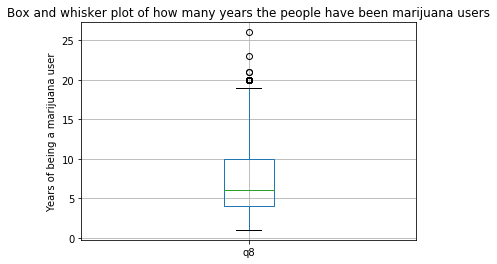

In [31]:
dataset.boxplot(column = ['q8'])
plt.ylabel('Years of being a marijuana user')
plt.title('Box and whisker plot of how many years the people have been marijuana users')

Scatterplot corresponding to questions regarding price(R) and quantity(g) of recent purchase. We can see a massive outlier where a person claimed they bought 2000Kg of marijuana from a dealer for around R200000. I think this is really unrealistsic compared to the data points in the bottom left so we will remove it.

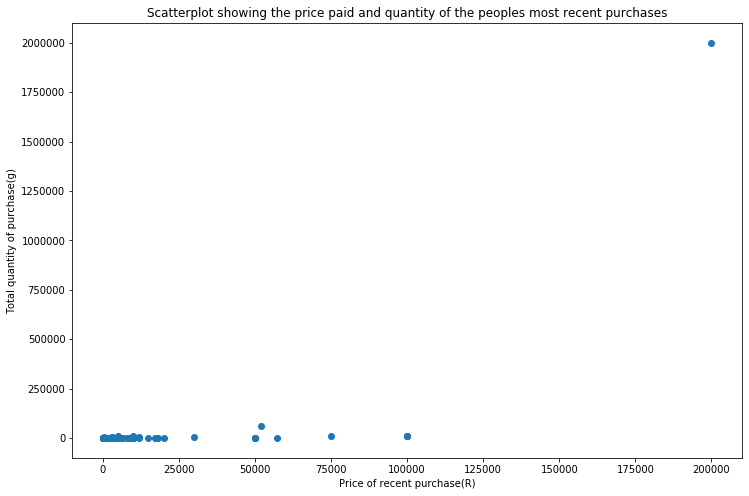

In [32]:
plt.figure(figsize=(12,8))
plt.scatter(dataset['q9'], dataset['q10'], alpha=1)
plt.xlabel('Price of recent purchase(R)')
plt.ylabel('Total quantity of purchase(g)')
plt.title('Scatterplot showing the price paid and quantity of the peoples most recent purchases')

#remove outlier on both datasets
i = dataset[(dataset['q9'] > 125000) & (dataset['q10'] > 1250000)].index
dataset = dataset.drop(i)
i = smallCityTownDataset[(smallCityTownDataset['q9'] > 125000) & (smallCityTownDataset['q10'] > 1250000)].index
smallCityTownDataset = smallCityTownDataset.drop(i)

Scatterplot after removing the outlier above. We can see another outlier where a person claimed they bought 60Kg of marijuana from a dealer for around R55000. I think this is really unrealistsic compared to the data points in the bottom of the plot so we will remove it.

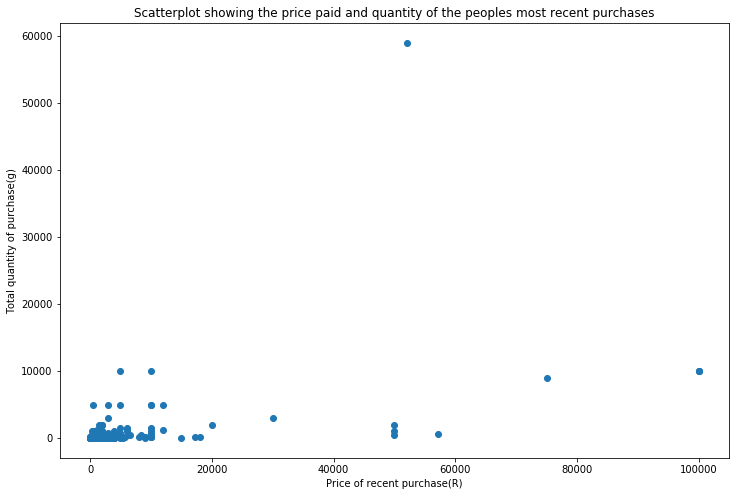

In [33]:
plt.figure(figsize=(12,8))
plt.scatter(dataset['q9'], dataset['q10'], alpha=1)
plt.xlabel('Price of recent purchase(R)')
plt.ylabel('Total quantity of purchase(g)')
plt.title('Scatterplot showing the price paid and quantity of the peoples most recent purchases')

#remove outlier on both datasets
i = dataset[(dataset['q9'] > 50000) & (dataset['q10'] > 40000)].index
dataset = dataset.drop(i)
i = smallCityTownDataset[(smallCityTownDataset['q9'] > 50000) & (smallCityTownDataset['q10'] > 40000)].index
smallCityTownDataset = smallCityTownDataset.drop(i)

Scatterplot after removing the outliers above. We can see that most point have close surrounding data points so I think its fine if we stop here. If necessary we can remove more outliers later.

Text(0.5, 1.0, 'Scatterplot showing the price paid and quantity of the peoples most recent purchases')

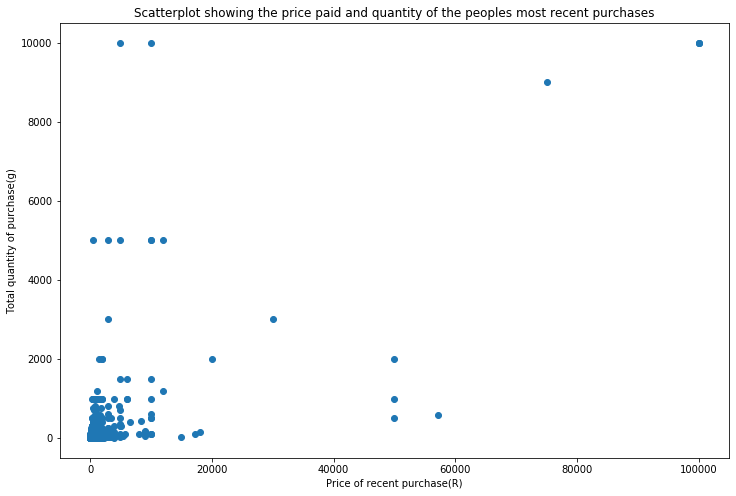

In [34]:
plt.figure(figsize=(12,8))
plt.scatter(dataset['q9'], dataset['q10'], alpha=1)
plt.xlabel('Price of recent purchase(R)')
plt.ylabel('Total quantity of purchase(g)')
plt.title('Scatterplot showing the price paid and quantity of the peoples most recent purchases')

Scatterplot corresponding to questions regarding price(R) and quantity(g) of other marijuana dealers sell. I think the data looks okay so far. We want the general trend that the price goes up with the quantity which is mostly there. The price is also obviously dependent on the quality of the marijuana as well.

Text(0.5, 1.0, 'Scatterplot showing the price and quantity of other marijuana the dealer sells')

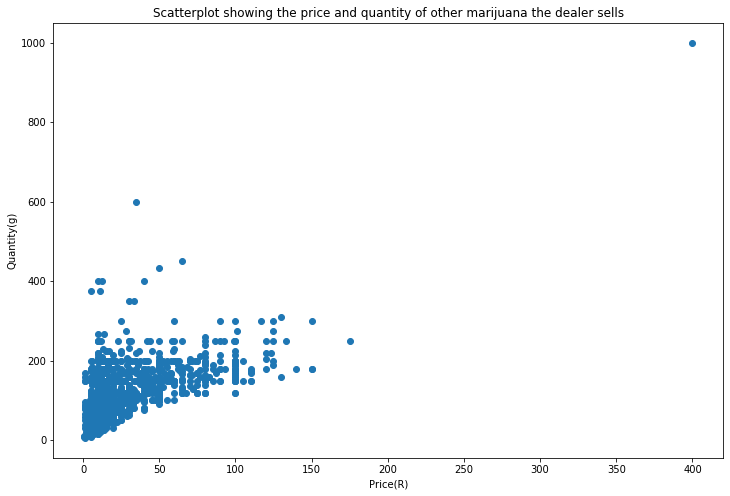

In [35]:
plt.figure(figsize=(12,8))
plt.scatter(dataset['q19_a'], dataset['q19_b'], alpha=1)
plt.xlabel('Price(R)')
plt.ylabel('Quantity(g)')
plt.title('Scatterplot showing the price and quantity of other marijuana the dealer sells')

#### Data sense checks

##### Sense check data from q1 to q13

A quick look though the prints below we can see that every aspect of the first printed cell(normal dataset) is similar to that of the second printed cell(small city/town dataset) with the exception of q13. This is because we changed categorised the small cities/towns in their own category for the second dataset. Thus what was printed makes sense.

In [36]:
print("####################################################################")   
print("Checking data quality of normal dataset")
print("####################################################################")   
for i in range(0,13):
    col = dataset.iloc[:,i].value_counts()
    print(col)
    print("----------------------------------------------------------------------------")

####################################################################
Checking data quality of normal dataset
####################################################################
I consent    2251
Name: q1, dtype: int64
----------------------------------------------------------------------------
Male           1612
Female          619
Undisclosed      20
Name: q2, dtype: int64
----------------------------------------------------------------------------
White          1556
Coloured        251
African         210
Undisclosed     110
Indian           88
Other            28
Asian             8
Name: q3, dtype: int64
----------------------------------------------------------------------------
20-29 years                           1450
30-39 years                            380
< 20 years (younger than 20 years)     203
40-49 years                            110
50 years and above                      96
Undisclosed                             12
Name: q4, dtype: int64
-----------------------

In [37]:
print("####################################################################")   
print("Checking data quality  of small city/town dataset")
print("####################################################################")   
for i in range(0,13):
    col = smallCityTownDataset.iloc[:,i].value_counts()
    print(col)
    print("----------------------------------------------------------------------------")

####################################################################
Checking data quality  of small city/town dataset
####################################################################
I consent    2251
Name: q1, dtype: int64
----------------------------------------------------------------------------
Male           1612
Female          619
Undisclosed      20
Name: q2, dtype: int64
----------------------------------------------------------------------------
White          1556
Coloured        251
African         210
Undisclosed     110
Indian           88
Other            28
Asian             8
Name: q3, dtype: int64
----------------------------------------------------------------------------
20-29 years                           1450
30-39 years                            380
< 20 years (younger than 20 years)     203
40-49 years                            110
50 years and above                      96
Undisclosed                             12
Name: q4, dtype: int64
-------------

##### Sense check data from q14

A quick look though the prints below we can see that every aspect of the first printed cell(normal dataset) is exactly the same to that of the second printed cell(small city/town dataset).

In [38]:
print("####################################################################")   
print("Checking data quality of normal dataset")
print("####################################################################") 
tot = 0
pnd = 0
for i in range(13,19):
    col = dataset.iloc[:,i].value_counts()
    print(col)
    if i != 18:
        tot = tot + col.to_numpy()[1]
    else:
        pnd = col.to_numpy()[1]
    print("----------------------------------------------------------------------------")
    
print("The total of the answered settlement types is " + str(tot))
tot = tot+pnd
print("Which with the people who chose not to answer gives a total of " + str(tot))

####################################################################
Checking data quality of normal dataset
####################################################################
True     2233
False      18
Name: q14_u, dtype: int64
----------------------------------------------------------------------------
True     1161
False    1090
Name: q14_r, dtype: int64
----------------------------------------------------------------------------
False    2230
True       21
Name: q14_i, dtype: int64
----------------------------------------------------------------------------
False    2196
True       55
Name: q14_rur, dtype: int64
----------------------------------------------------------------------------
False    2007
True      244
Name: q14_m, dtype: int64
----------------------------------------------------------------------------
False    2083
True      168
Name: q14_pnd, dtype: int64
----------------------------------------------------------------------------
The total of the answered settle

In [39]:
print("####################################################################")   
print("Checking data quality  of small city/town dataset")
print("####################################################################")
tot = 0
pnd = 0
for i in range(13,19):
    col = smallCityTownDataset.iloc[:,i].value_counts()
    print(col)
    if i != 18:
        tot = tot + col.to_numpy()[1]
    else:
        pnd = col.to_numpy()[1]
    print("----------------------------------------------------------------------------")
    
print("The total of the answered settlement types is " + str(tot))
tot = tot+pnd
print("Which with the people who chose not to answer gives a total of " + str(tot))

####################################################################
Checking data quality  of small city/town dataset
####################################################################
True     2233
False      18
Name: q14_u, dtype: int64
----------------------------------------------------------------------------
True     1161
False    1090
Name: q14_r, dtype: int64
----------------------------------------------------------------------------
False    2230
True       21
Name: q14_i, dtype: int64
----------------------------------------------------------------------------
False    2196
True       55
Name: q14_rur, dtype: int64
----------------------------------------------------------------------------
False    2007
True      244
Name: q14_m, dtype: int64
----------------------------------------------------------------------------
False    2083
True      168
Name: q14_pnd, dtype: int64
----------------------------------------------------------------------------
The total of the answe

##### Sense check data from q16 onwards

A quick look though the prints below we can see that every aspect of the first printed cell(normal dataset) is exactly the same to that of the second printed cell(small city/town dataset).

In [40]:
print("####################################################################")   
print("Checking data quality of normal dataset")
print("####################################################################") 
for i in range(19,26):
    col = dataset.iloc[:,i].value_counts()
    print(col)
    print("----------------------------------------------------------------------------")

####################################################################
Checking data quality of normal dataset
####################################################################
10.0    632
8.0     436
7.0     273
5.0     208
9.0     207
6.0     153
4.0      97
2.0      91
3.0      90
1.0      59
Name: q16, dtype: int64
----------------------------------------------------------------------------
More than 30 days    310
30                   309
7                    284
5                    157
2                    150
3                    149
14                   149
10                   120
4                     89
1                     74
20                    66
25                    59
15                    57
6                     56
21                    53
8                     26
12                    25
Undisclosed           23
9                     14
28                    12
16                    10
22                     9
24                     9
17                     9
2

In [41]:
print("####################################################################")   
print("Checking data quality  of small city/town dataset")
print("####################################################################")
for i in range(19,26):
    col = smallCityTownDataset.iloc[:,i].value_counts()
    print(col)
    print("----------------------------------------------------------------------------")

####################################################################
Checking data quality  of small city/town dataset
####################################################################
10.0    632
8.0     436
7.0     273
5.0     208
9.0     207
6.0     153
4.0      97
2.0      91
3.0      90
1.0      59
Name: q16, dtype: int64
----------------------------------------------------------------------------
More than 30 days    310
30                   309
7                    284
5                    157
2                    150
3                    149
14                   149
10                   120
4                     89
1                     74
20                    66
25                    59
15                    57
6                     56
21                    53
8                     26
12                    25
Undisclosed           23
9                     14
28                    12
16                    10
22                     9
24                     9
17              

##### We did sense checks on the datatypes of each dataframe when we corrected the datatypes in a section above

### To round off this data wrangling section we will run through the aspects of data quality to ensure our datasets conform to the standards:
* Our datasets conform to a standard format through all the rectifying done above, thus it is valid. 
* Our datasets are accurate as they were accrued from a trusted source described at the beginning of the notebook.
* All records except for useless records and outlying records are present so I think our datasets are pretty complete. We removed records in which people did not buy marijuana from dealers as it would not help us infer anything price or dealer wise.
* We ensured consistency by making sure our fields all were the correct datatypes. We also made our datasets more consitent by fixing the errors people made when entering their city/town. Thus now that field can be used for inference.
* When the data was collected in the manner of the survey. They made sure to specify whenever an answer was needed price or quantity wise that the people should enter it in the correct units which are Rands and grams. The other fields are just categorical so we can conclude now that our data is uniform.

In [42]:
display(dataset)

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,...,q14_rur,q14_m,q14_pnd,q16,q17,q18,q19_a,q19_b,q20,q21
0,I consent,Male,Other,< 20 years (younger than 20 years),R5000-R9999,2-3 times per week,2-3 times per week,5.0,200.0,10.0,...,False,False,False,10.0,2,Yes,10.000000,250.0,No,Yes
1,I consent,Female,Undisclosed,20-29 years,R10 000- R14 999,Everyday,2-3 times per month,6.0,500.0,10.0,...,False,False,False,6.0,30,Yes,NaN,130.0,No,No
2,I consent,Male,White,20-29 years,R5000-R9999,2-3 times per week,Once per month (or less),10.0,200.0,5.0,...,False,False,False,10.0,More than 30 days,Yes,10.869565,150.0,No,Yes
3,I consent,Female,White,< 20 years (younger than 20 years),< R1000 (less than R1000),2-3 times per month,Once per month (or less),4.0,400.0,6.0,...,False,False,False,8.0,14,Yes,50.000000,100.0,Yes,No
4,I consent,Male,White,20-29 years,R5000-R9999,Everyday,2-3 times per month,13.0,1200.0,40.0,...,False,False,False,8.0,30,No,NaN,NaN,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2249,I consent,Male,White,20-29 years,R1000- R4999,Everyday,2-3 times per month,3.0,250.0,10.0,...,False,False,False,7.0,5,Yes,15.000000,50.0,No,No
2250,I consent,Male,White,30-39 years,R30 000 and above,Everyday,Once per month (or less),10.0,3000.0,40.0,...,False,False,True,8.0,30,Yes,45.000000,140.0,No,No
2251,I consent,Male,White,30-39 years,R30 000 and above,Everyday,Once per month (or less),10.0,3000.0,40.0,...,False,False,True,8.0,30,Yes,45.000000,140.0,No,No
2252,I consent,Female,White,20-29 years,R1000- R4999,Everyday,2-3 times per month,4.0,300.0,10.0,...,False,False,False,3.0,12,NaN,10.000000,NaN,Yes,No


In [43]:
display(smallCityTownDataset)

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,...,q14_rur,q14_m,q14_pnd,q16,q17,q18,q19_a,q19_b,q20,q21
0,I consent,Male,Other,< 20 years (younger than 20 years),R5000-R9999,2-3 times per week,2-3 times per week,5.0,200.0,10.0,...,False,False,False,10.0,2,Yes,10.000000,250.0,No,Yes
1,I consent,Female,Undisclosed,20-29 years,R10 000- R14 999,Everyday,2-3 times per month,6.0,500.0,10.0,...,False,False,False,6.0,30,Yes,NaN,130.0,No,No
2,I consent,Male,White,20-29 years,R5000-R9999,2-3 times per week,Once per month (or less),10.0,200.0,5.0,...,False,False,False,10.0,More than 30 days,Yes,10.869565,150.0,No,Yes
3,I consent,Female,White,< 20 years (younger than 20 years),< R1000 (less than R1000),2-3 times per month,Once per month (or less),4.0,400.0,6.0,...,False,False,False,8.0,14,Yes,50.000000,100.0,Yes,No
4,I consent,Male,White,20-29 years,R5000-R9999,Everyday,2-3 times per month,13.0,1200.0,40.0,...,False,False,False,8.0,30,No,NaN,NaN,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2249,I consent,Male,White,20-29 years,R1000- R4999,Everyday,2-3 times per month,3.0,250.0,10.0,...,False,False,False,7.0,5,Yes,15.000000,50.0,No,No
2250,I consent,Male,White,30-39 years,R30 000 and above,Everyday,Once per month (or less),10.0,3000.0,40.0,...,False,False,True,8.0,30,Yes,45.000000,140.0,No,No
2251,I consent,Male,White,30-39 years,R30 000 and above,Everyday,Once per month (or less),10.0,3000.0,40.0,...,False,False,True,8.0,30,Yes,45.000000,140.0,No,No
2252,I consent,Female,White,20-29 years,R1000- R4999,Everyday,2-3 times per month,4.0,300.0,10.0,...,False,False,False,3.0,12,NaN,10.000000,NaN,Yes,No
